### 점진적 학습, 온라인 학습
데이터가 도착할 때 마다 모델을 업데이트 하는것. 대규모 데이터세트를 다루거나, 변화하는 데이터에 대응해야하는 온라인 시스템에서 중요함.

새로운 정보를 학습하면서도, 이전에 학습한 정보를 유지한다.

장점:
- 전체 데이터를 메모리에 로드할 필요가 없어서 메모리 사용량을 줄일 수 있다.
- 시스템이 최신 데이터에 대응할 수 있다.
- 점진적으로 처리함으로써 대규모 데이터세트를 다룰 수 있다.


### 확률적 경사 하강법 (Stochastic Gradient Descent)
가장 가파른 경사를 따라 원하는 지점에 도달하는것을 목표로 설계된 알고리즘.

**경사하강법**



- 손실함수의 최소값을 찾기 위해 모델의 매개변수를 조정하는 방법.
- 쉽게 말하면 더 잘 예측하는 모델을 도출하기 위해 가중치를 조절하는것이다.
- 손실함수를 모델에 대해 미분하면, 매개변수를 어떻게 조정해야 손실함수를 작게할 수 있는지 알 수 있다.
- 각 에포크마다 매개변수를 조정해가며 시도한다. 따라서 점진적 학습(`partial fit`)이 가능하다.
- 지역 최소값이나 안장점에 빠질 위험이 있다.

**확률적**

SGD에서 랜덤한 데이터 서브세트를 사용하는 이유
- 비교적 계산 비용이낮다. 그래서 더 빠르게 학습할 수 있다.
- 과적합을 방지한다.
- 랜덤성 덕분에 지역최소값에서 벗어날 가능성이 높다.
- 대규모 데이터셋을 학습할때, 서브세트를 점진적으로 학습할 수 있다.
- 점진적 학습에 적합하다.

### 손실함수
머신 러닝 모델의 예측값과 실제값 사이의 차이를 수치화하는 함수. 모델의 성능을 평가하는데 사용하고, 모델은 학습하는동안 이 수치를 최소화 하기 위해 사용한다.
- MSE : 평균제곱 오차. 회귀 문제에서 손실함수로 사용된다.
- 크로스 엔트로피 손실 : 분류 문제에서 실제 클래스에 속할 확률을 얼마나 잘 예측하는지 나타낸다.
- 손실 함수는 모델에 따라 엄격하게 정의되는 것이 아니라, 주어진 문제의 특성과 목적에 맞게 선택하거나 설계된다.

### SGD Classifier

In [2]:
# 데이터 임포트 및 통계량 확인
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
print(pd.DataFrame(fish['Species'].value_counts()).T)
print(fish.columns)

Species  Perch  Bream  Roach  Pike  Smelt  Parkki  Whitefish
count       56     35     20    17     14      11          6
Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')


In [3]:
# 훈련세트와 테스트 세트로 나누기   
from sklearn.model_selection import train_test_split

fish_input, fish_target = fish.iloc[:, 1:], fish.iloc[:,0]

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [4]:
# 훈련세트와 테스트 세트의 특성을 표준화 처리
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_input)

train_scaled = scaler.transform(train_input)
test_scaled = scaler.transform(test_input)

In [5]:
# 확률적 경사 하강법
from sklearn.linear_model import SGDClassifier

`SGDClassfier`의 객체를 만들떄는 2개의 매개변수를 지정한다. 
- `loss`는 손실함수의 종류를 지정한다. 여기에서는 `log_loss`로 지정하여 로지스틱 손실함수를 지정한다.
- `max_iter`은 수행할 에포크 횟수를 지정한다.

In [6]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(f'train score : {sc.score(train_scaled, train_target)}')
print(f'test score  : {sc.score(test_scaled, test_target)} ')

# 10번으로 지정할 경우에, 수렴 이전에 max_iter에 도달했다고 경고문 발생

train score : 0.773109243697479
test score  : 0.775 


c:\Users\fdsaf\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [7]:
# 경사 하강법은 점진적 학습이 가능하다. partial_fit() 메서드를 사용하면 1 에포크씩 이어서 훈련할 수 있다.

In [8]:
sc.partial_fit(train_scaled, train_target)
print(f'train score : {sc.score(train_scaled, train_target)}')
print(f'test score  : {sc.score(test_scaled, test_target)} ')
# 평가 점수가 상승된것을 볼 수 있다.

train score : 0.8151260504201681
test score  : 0.8 


- 적은 에포크 회수를 훈련한 모델은 과소적합일 가능성이 높다. 
- 반대로 너무 많은 에포크를 훈련한 모델은 과대 적합일 위험이 있다.
- 과대적합이 시작되기 전에 훈련을 멈추는것을 **조기종료**라고한다.

In [22]:
# partial_fit() 메서드를 사용하여 300번의 에포크 동안 훈련점수와 테스트 점수를 파악한다.
sc = SGDClassifier(loss='log_loss', random_state=42)
train_scores = []
test_scores = []

# partial_fit() 메서드만 사용하려면 전체 클래스 레이블을 전달해야한다.
classes = fish_target.unique()

for _ in range(300):
    sc.partial_fit(train_scaled, train_target, classes = classes) 
    train_scores.append(sc.score(train_scaled, train_target))
    test_scores.append(sc.score(test_scaled, test_target))
    


Text(0, 0.5, 'score')

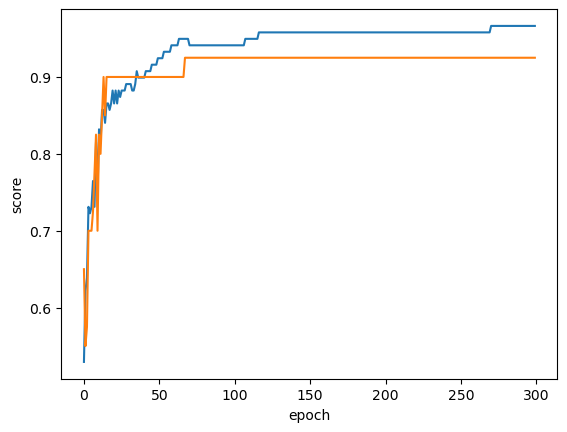

In [25]:
import matplotlib.pyplot as plt

plt.plot(train_scores)
plt.plot(test_scores)
plt.xlabel('epoch')
plt.ylabel('score')

그래프를 통해 봤을때, epoch가 100정도면 조기종료하기에 적합하다.

In [40]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)  # tol=None을 지정하지 않으면, 일정 에포크동안 성능이 향상되지 않으면 자동으로 멈춘다.
sc.fit(train_scaled, train_target)
print(f'train score : {sc.score(train_scaled, train_target)}')
print(f'test score : {sc.score(test_scaled, test_target)}')



train score : 0.957983193277311
test score : 0.925
